# Bitcoin
Bitcoin was the first cryptocurrency to successfully record transactions on a secure, decentralized blockchain-based network. Launched in early 2009 by its pseudonymous creator Satoshi Nakamoto, Bitcoin is the largest cryptocurrency measured by market capitalization and amount of data stored on its blockchain. 

In [ ]:
pip install tensorflow==2.2

     |████████████████████████████████| 26.1MB 161kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.6.3
    Uninstalling scipy-1.6.3:
      Successfully uninstalled scipy-1.6.3


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import *
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Bidirectional, Input
from tensorflow.python.keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
#from keras.models import Sequential
#from keras.utils import Sequence

In [3]:
path = 'coin_Bitcoin.csv'
data = pd.read_csv(path)
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


- Date : date of observation
- Open : Opening price on the given day
- High : Highest price on the given day
- Low : Lowest price on the given day
- Close : Closing price on the given day
- Volume : Volume of transactions on the given day
- Market Cap : Market capitalization in USD

### Definitions:
- Opening price: The price from the first transaction of a business day
- Closing price : The price paid in the last transaction of a business day
- Market capitalization: Refers to the total dollar market value of a company's outstanding shares of stock

# Bitcoin dataset EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


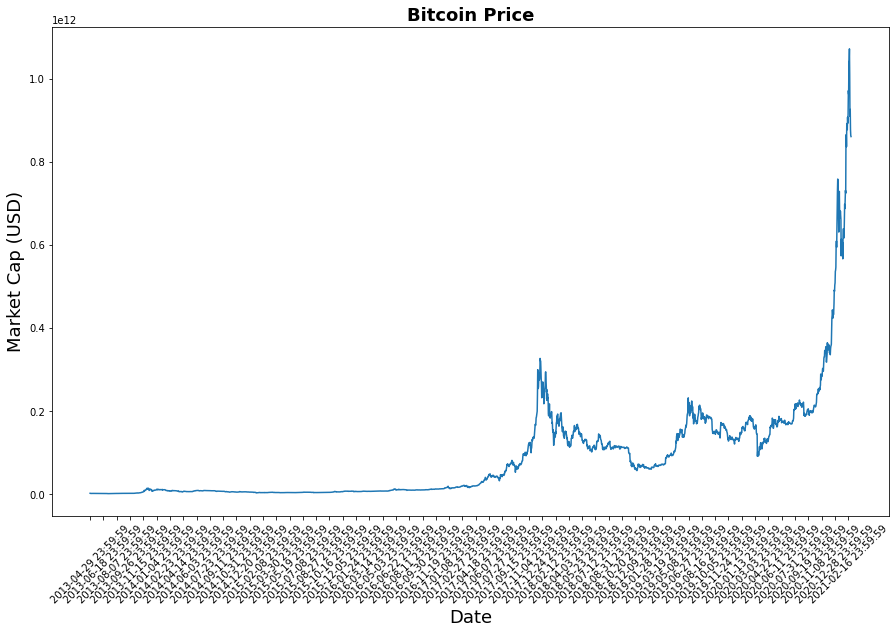

In [5]:
mcap = data[['Marketcap']]

plt.figure(figsize = (15,9))
plt.plot(mcap)
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Market Cap (USD)',fontsize=18)
plt.show()

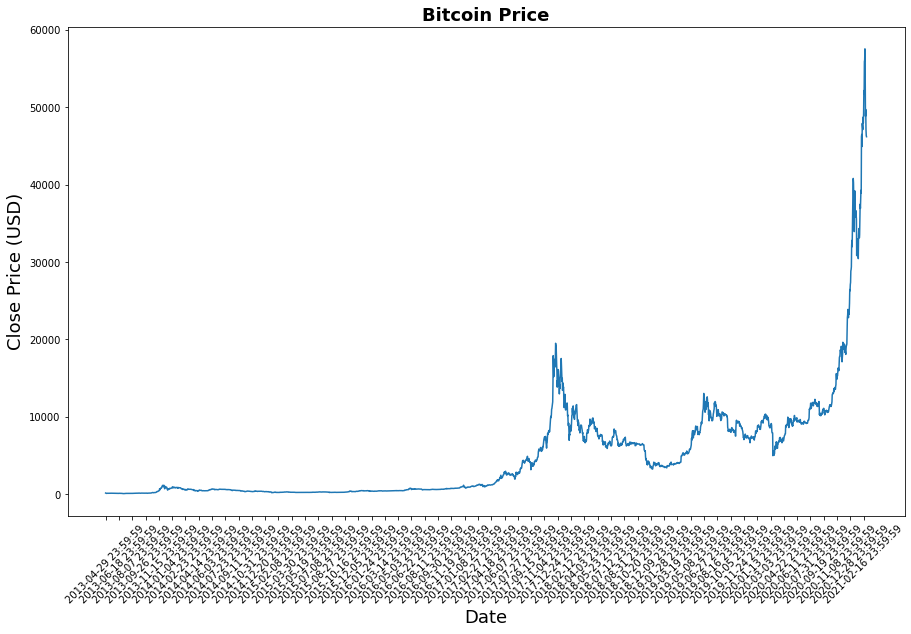

In [ ]:
price = data[['Close']]

plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

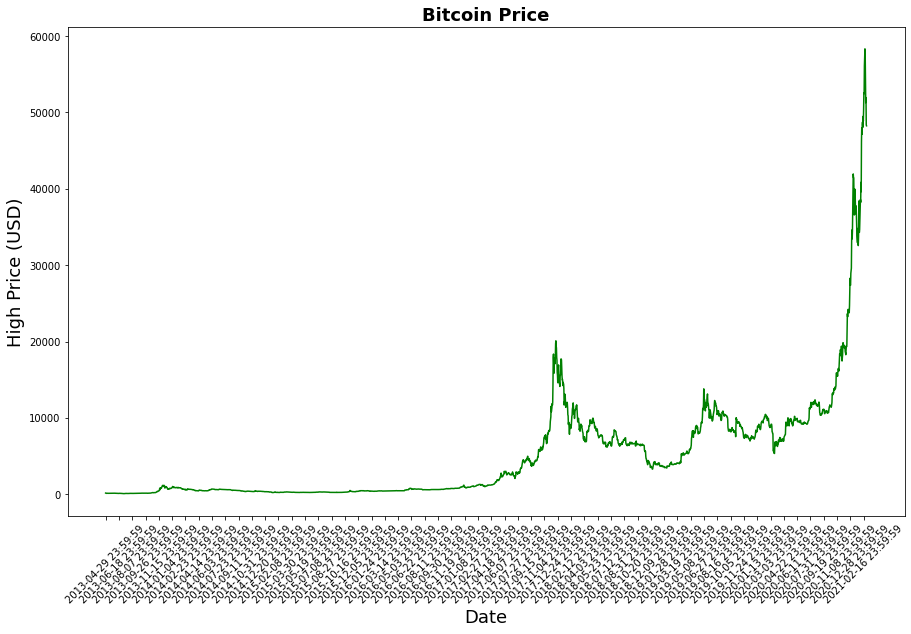

In [ ]:
price = data[['Close']]
plt.figure(figsize = (15,9))
plt.plot(data[['High']],'#008000')
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('High Price (USD)',fontsize=18)
plt.show()

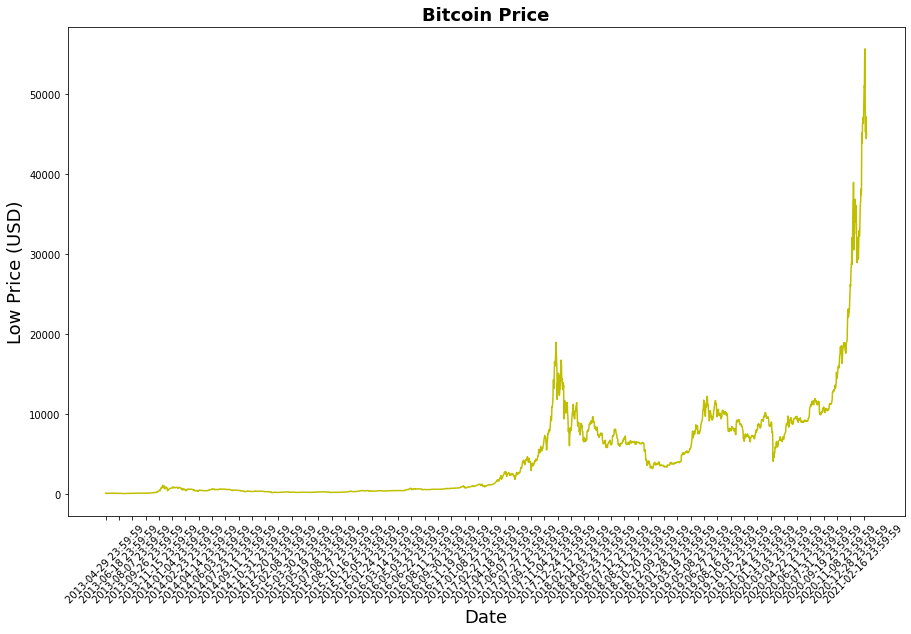

In [ ]:
price = data[['Close']]
plt.figure(figsize = (15,9))
plt.plot(data[['Low']],'y')
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Low Price (USD)',fontsize=18)
plt.show()

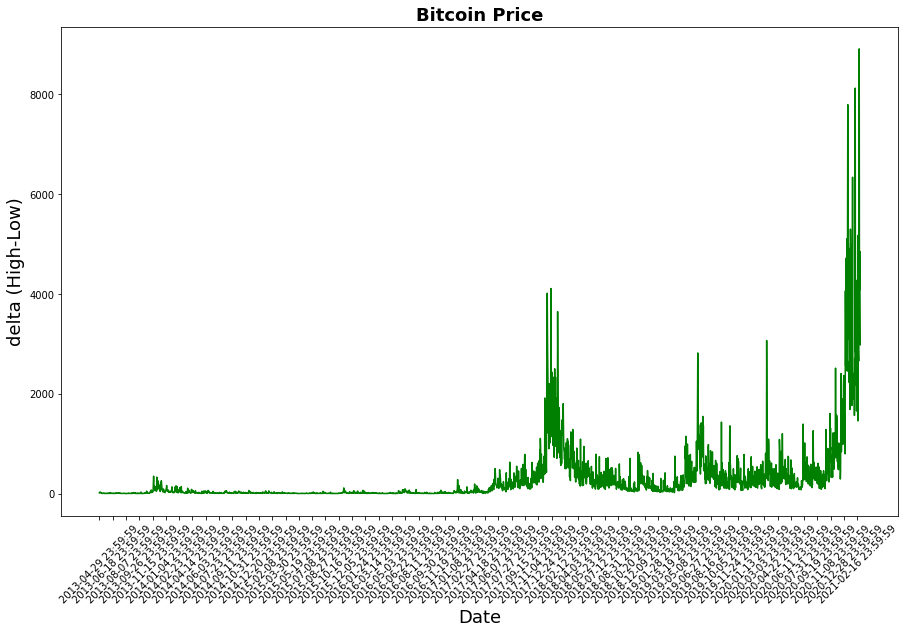

In [ ]:
data['Delta'] = data['High'] - data['Low']
delta = data['High'] - data['Low']
plt.figure(figsize = (15,9))
plt.plot(delta,'g')
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('delta (High-Low)',fontsize=18)
plt.show()

# Market capitalization
Market capitalization refers to the total dollar market value of a company's outstanding shares. Colloquially called "market cap," it is calculated by multiplying the total number of a company's shares by the current market price of one share. The investment community uses this figure to determine a company's size, and basically how the stock market is valuing the company.
## Key takeaways:
- Market capitalization is the total dollar value of all of a company's outstanding shares.
- It's determined by multiplying the company's stock price by its total number of outstanding shares.
- Investors can use market capitalization to assess the value of a stock they are considering buying.
- Market capitalization is a key measure of profitability that is also used in equations to determine price-to-earnings and other significant metrics.

Unlike investing in traditional currencies, bitcoin is not issued by a central bank or backed by a government. And buying a bitcoin is different than purchasing a stock or bond because bitcoin is not a corporation.

# Is market cap the best way to measure the popularity of a cryptocurrency?

Large-cap cryptocurrencies are generally considered to be safe crypto investments. These are companies with a market cap of more than $10 billion. Investing in coins with large market capitalisation is usually a conservative strategy. These coins are likely to be less volatile than other cryptocurrencies but still more volatile than traditional assets like stocks

Mid-cap cryptos are more volatile but also have a lot more growth potential than large-cap cryptocurrencies.

Small-cap cryptocurrencies are often extremely volatile and considered a highly risky investment, albeit sometimes with a lot of potential (short-term) growth. However, be aware that they may also crash, literally from one minute to the next.

In [ ]:
data.drop('SNo',1).corr()

,High,Low,Open,Close,Volume,Marketcap
High,1.000000,0.998466,0.999172,0.999358,0.811861,0.998529
Low,0.998466,1.000000,0.998568,0.999034,0.808784,0.998439
Open,0.999172,0.998568,1.000000,0.998288,0.811214,0.997531
Close,0.999358,0.999034,0.998288,1.000000,0.810448,0.999305
Volume,0.811861,0.808784,0.811214,0.810448,1.000000,0.818189
Marketcap,0.998529,0.998439,0.997531,0.999305,0.818189,1.000000


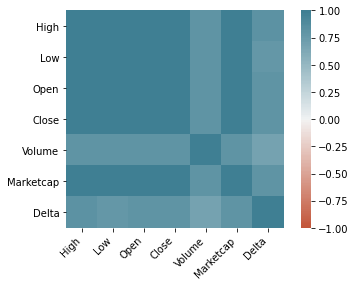

In [ ]:

# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = data.drop('SNo',1).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(data, test_size=0.2)
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

NameError: ignored

In [ ]:
train

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2285,2286,Bitcoin,BTC,2019-08-01 23:59:59,10446.920330,9922.019816,10077.442592,10399.669423,1.716534e+10,1.856532e+11
2286,2287,Bitcoin,BTC,2019-08-02 23:59:59,10657.952710,10371.013988,10402.043427,10518.174677,1.748909e+10,1.877911e+11
2287,2288,Bitcoin,BTC,2019-08-03 23:59:59,10946.781326,10503.504397,10519.278349,10821.726510,1.535269e+10,1.932340e+11
2288,2289,Bitcoin,BTC,2019-08-04 23:59:59,11009.206914,10620.278252,10821.632939,10970.184216,1.653089e+10,1.959079e+11


## Bitcoin value forecasting.

### What are the assumptions we make on what determines Bitcoin's price?
- The supply of bitcoin and the market's demand for it
- The cost of producing a bitcoin through the mining process
- The rewards issued to bitcoin miners for verifying transactions to the blockchain
- The number of competing cryptocurrencies
- The exchanges it trades on
- Regulations governing its sale
- Its internal governance

## LSTM
Long-Short Term Memory (LSTM) is a type of RNN that allows us to process not only single data points (such as images) but also entire sequences of data (such as speech or video). They are a great choice for time series forecasting, and they are the type of architecture we will be using today.

In [22]:
scaler = MinMaxScaler()
close_price = data.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [23]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [29]:
to_sequences(scaled_close,5).shape

(2857, 5, 1)

In [41]:
d = []

for index in range(len(scaled_close) - 100):
    d.append(scaled_close[index: index + 100])


In [42]:
d = np.array(d)

In [43]:
# we have 2762 of 100 length windows for data
d.shape

(2762, 100, 1)

In [40]:
d.shape

(1, 100, 1)

In [44]:
num_train = int(0.95 * d.shape[0])

In [45]:
num_train

2623

In [47]:
X_train = d[:num_train, :-1, :]
y_train = d[:num_train, -1, :]

X_test = d[num_train:, :-1, :]
y_test = d[num_train:, -1, :]

In [49]:
X_test 

(139, 99, 1)

# Sequence Prediction with LSTMs
Creation of a problem that involves using historical sequence information to predict the next value or values in the sequence.LSTMs work by learning a function (f(…)) that maps input sequence values (X) onto output sequence values (y).

In [7]:

SEQ_LEN = 100


# adding data of 100 sequences to a list, and moving towards the future by 1 step
def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)
# 
def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [8]:
X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [16]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

In [51]:
BATCH_SIZE = 64

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/30


KeyboardInterrupt: ignored

In [53]:
y_hat = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

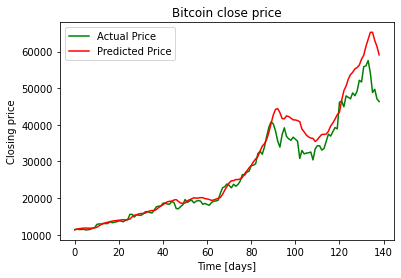

In [55]:
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')

plt.title('Bitcoin close price')
plt.xlabel('Time [days]')
plt.ylabel('Closing price')
plt.legend(loc='best')
 
plt.show();